In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
for i in train_data.columns:
    print(f"Unique values count of {i} = {train_data[i].nunique()}")

Unique values count of PassengerId = 891
Unique values count of Survived = 2
Unique values count of Pclass = 3
Unique values count of Name = 891
Unique values count of Sex = 2
Unique values count of Age = 88
Unique values count of SibSp = 7
Unique values count of Parch = 7
Unique values count of Ticket = 681
Unique values count of Fare = 248
Unique values count of Cabin = 147
Unique values count of Embarked = 3


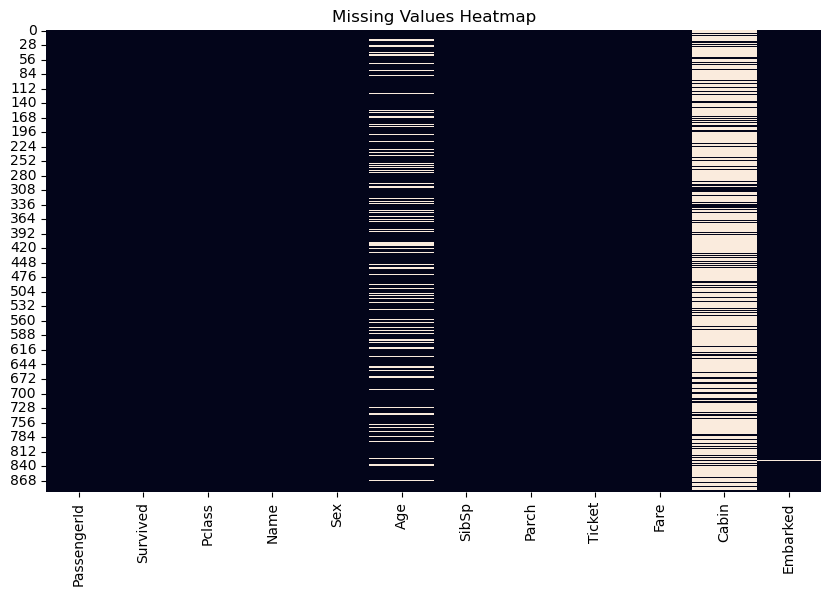

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [33]:
train_data['Embarked']=train_data.Embarked.fillna(train_data.Embarked.mode()[0])

In [34]:
train_data=train_data.drop(['Cabin','PassengerId','Ticket'],axis=1)
test_data=test_data.drop(['PassengerId','Cabin','Ticket'],axis=1)

In [35]:
train_data['Sex'] = train_data.Sex.map({'male': 1, 'female': 0})
train_data['Embarked'] = train_data.Embarked.map({'S':1,'C':2, 'Q':3})
test_data['Sex'] = test_data.Sex.map({'male': 1, 'female': 0})
test_data['Embarked'] = test_data.Embarked.map({'S':1,'C':2, 'Q':3, np.nan:0})

In [36]:
cat_values_col = ['Embarked','Parch','Pclass','Sex','SibSp']

In [37]:
train_data['Survived']=train_data['Survived'].astype(str)

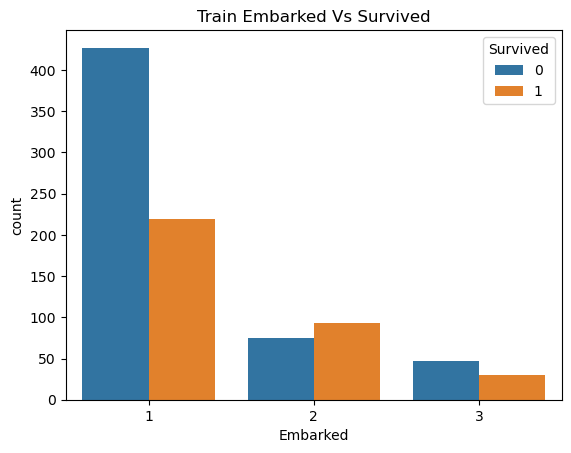

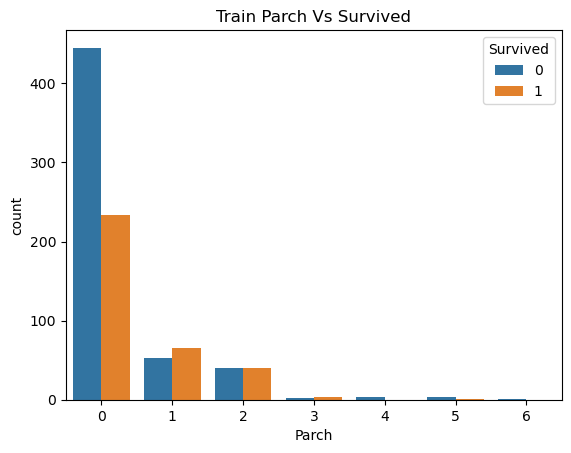

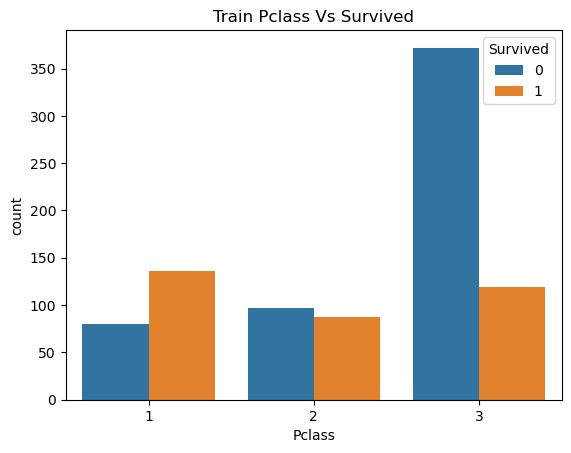

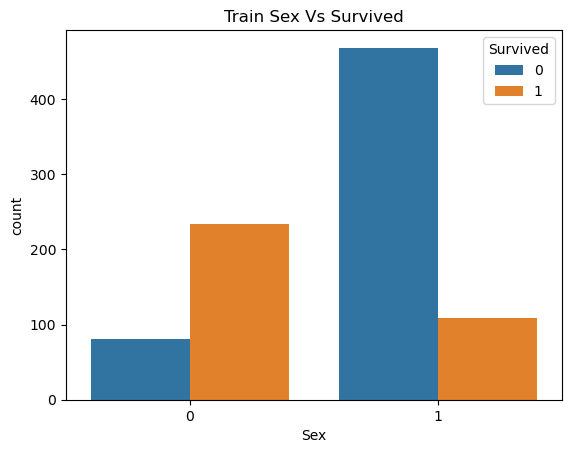

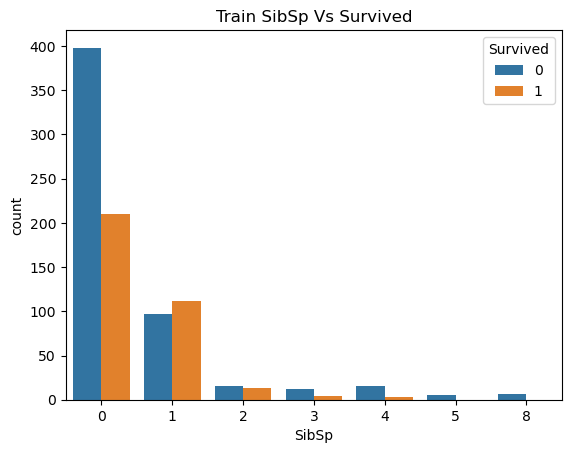

In [38]:
for c in cat_values_col:
    sns.countplot(x=c,hue='Survived',data=train_data)
    plt.title(f'Train {c} Vs Survived')
    plt.show()

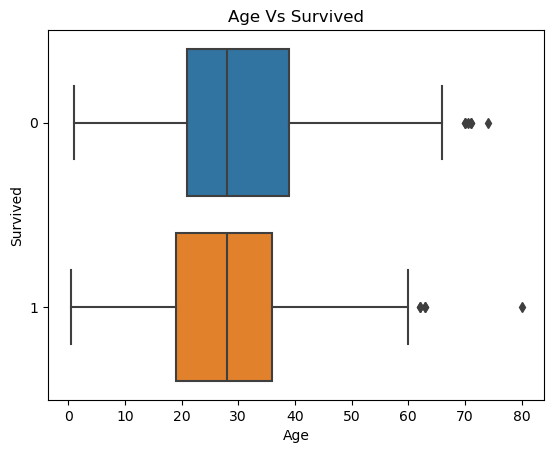

In [39]:
sns.boxplot(x='Age',y='Survived',data=train_data)
plt.title('Age Vs Survived')
plt.show()

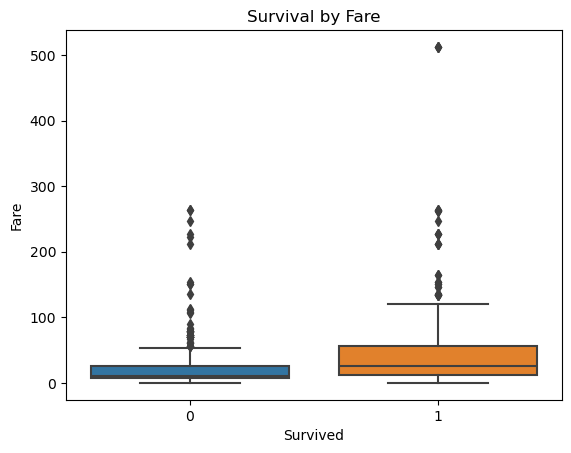

In [40]:
sns.boxplot(x='Survived',y='Fare',data=train_data)
plt.title('Survival by Fare')
plt.show()

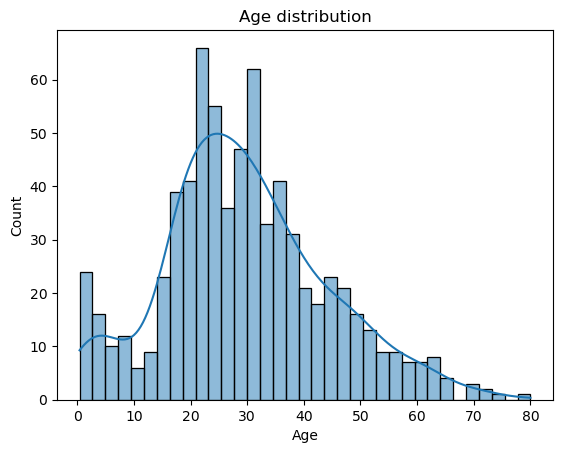

In [41]:
sns.histplot(train_data['Age'].dropna(),bins=35,kde=True)
plt.title('Age distribution')
plt.show()

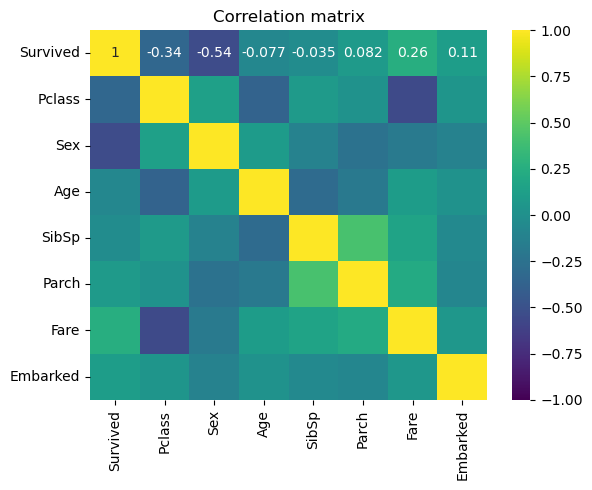

In [42]:
corr=train_data.drop(['Name'],axis=1)
corr_mat=corr.corr()
sns.heatmap(corr_mat,annot=True,cmap='viridis',vmin=-1,vmax=1)
plt.title('Correlation matrix')
plt.show()

In [43]:
corr_mat.Survived.abs().sort_values(ascending=False)

Survived    1.000000
Sex         0.543351
Pclass      0.338481
Fare        0.257307
Embarked    0.106811
Parch       0.081629
Age         0.077221
SibSp       0.035322
Name: Survived, dtype: float64

In [44]:
sib_train = train_data[(train_data.SibSp == 8) | (train_data.SibSp == 5)]
sib_test = test_data[(test_data.SibSp == 8) | (test_data.SibSp == 5)]
parch_train = train_data[(train_data.Parch == 4) | (train_data.Parch == 6)]
parch_4_6_test = test_data[(test_data.Parch == 4) | (test_data.Parch == 6)]

In [45]:
train_data=train_data.drop(['Name'],axis=1)
test_data=test_data.drop(['Name'],axis=1)

In [46]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [47]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [58]:
train_data=train_data.fillna(0)

In [59]:
x=train_data.drop('Survived',axis=1)
y=train_data.Survived

In [60]:
scaler=StandardScaler()
x[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]=scaler.fit_transform(x[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [1]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.930949720670391
